# Función de $Loss$   

In [1]:
import torch as pt
import matplotlib.pyplot as plt

Escribiendo $wo$ y $X$:

In [2]:
wo=-30.0
X=pt.arange(-3,3,0.1).view(-1,1)

In [3]:
#Vector fila:
pt.arange(-3,3,0.1)

tensor([-3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000, -2.4000, -2.3000,
        -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000, -1.6000, -1.5000,
        -1.4000, -1.3000, -1.2000, -1.1000, -1.0000, -0.9000, -0.8000, -0.7000,
        -0.6000, -0.5000, -0.4000, -0.3000, -0.2000, -0.1000,  0.0000,  0.1000,
         0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,  0.8000,  0.9000,
         1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,  1.6000,  1.7000,
         1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,  2.4000,  2.5000,
         2.6000,  2.7000,  2.8000,  2.9000])

In [4]:
pt.arange(-3,3,0.1).shape

torch.Size([60])

In [5]:
#Vector columna:
pt.arange(-3,3,0.1).view(-1,1)

tensor([[-3.0000],
        [-2.9000],
        [-2.8000],
        [-2.7000],
        [-2.6000],
        [-2.5000],
        [-2.4000],
        [-2.3000],
        [-2.2000],
        [-2.1000],
        [-2.0000],
        [-1.9000],
        [-1.8000],
        [-1.7000],
        [-1.6000],
        [-1.5000],
        [-1.4000],
        [-1.3000],
        [-1.2000],
        [-1.1000],
        [-1.0000],
        [-0.9000],
        [-0.8000],
        [-0.7000],
        [-0.6000],
        [-0.5000],
        [-0.4000],
        [-0.3000],
        [-0.2000],
        [-0.1000],
        [ 0.0000],
        [ 0.1000],
        [ 0.2000],
        [ 0.3000],
        [ 0.4000],
        [ 0.5000],
        [ 0.6000],
        [ 0.7000],
        [ 0.8000],
        [ 0.9000],
        [ 1.0000],
        [ 1.1000],
        [ 1.2000],
        [ 1.3000],
        [ 1.4000],
        [ 1.5000],
        [ 1.6000],
        [ 1.7000],
        [ 1.8000],
        [ 1.9000],
        [ 2.0000],
        [ 2.1000],
        [ 2.

In [6]:
pt.arange(-3,3,0.1).view(-1,1).shape

torch.Size([60, 1])

In [7]:
f=-3*X

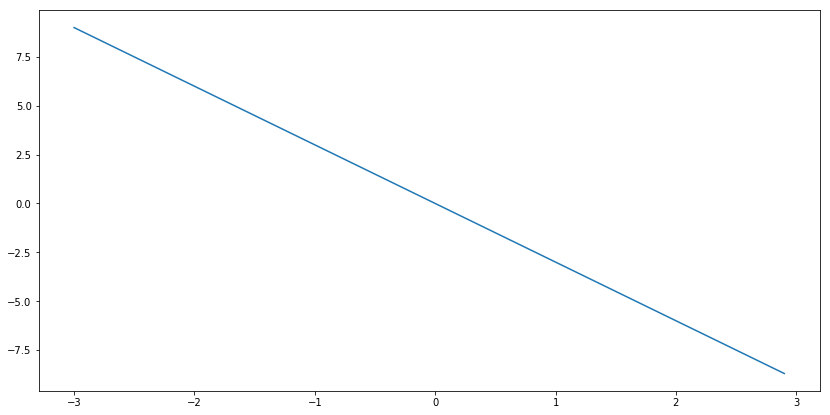

In [8]:
plt.figure(figsize=(14,7))
plt.plot(X.numpy(),f.numpy())
plt.show()

In [9]:
Y=f+0.45*pt.randn(X.size())

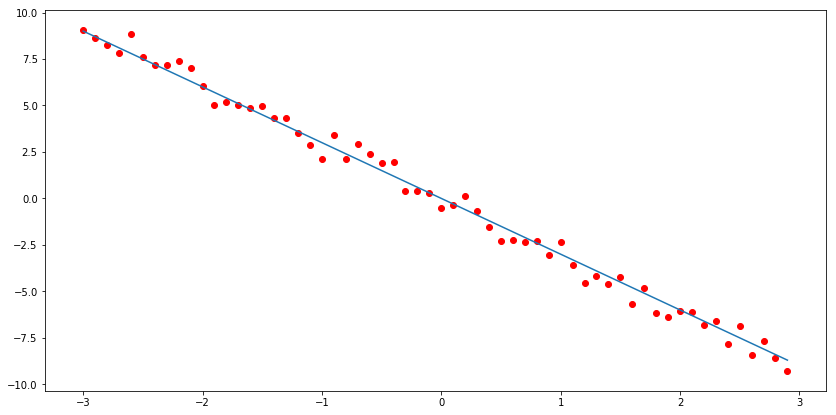

In [10]:
plt.figure(figsize=(14,7))
plt.plot(X.numpy(),f.numpy())
plt.scatter(X.numpy(),Y.numpy(),c='red')

Definiendo las funciones auxiliares:

In [11]:
def forward(w,x):    
    y=w*x
    return y

In [12]:
def criterion(yhat,y):
    return pt.mean(pow(yhat-y,2))

Definiendo la función principal:

In [13]:
def lossf(n):
    lr=0.1
    w= pt.tensor(wo,requires_grad=True)
    LOSS=[]
    Ws =[]
    for iterar in range(n):
        Yhat= forward(w,X)
        Ws.append(float(w.data))
        loss=criterion(Yhat,Y)
        loss.backward()
        LOSS.append(float(loss.data))
        w.data+=-lr*w.grad
        w.grad.data.zero_()
    return range(1,n+1),Ws,LOSS

In [14]:
lossf(10)

(range(1, 11),
 [-30.0,
  -13.837095260620117,
  -7.377318859100342,
  -4.795561790466309,
  -3.763719081878662,
  -3.3513262271881104,
  -3.1865062713623047,
  -3.120633363723755,
  -3.094306230545044,
  -3.0837841033935547],
 [2176.012451171875,
  347.7716064453125,
  55.740108489990234,
  9.092926025390625,
  1.641804575920105,
  0.4516126811504364,
  0.2614987790584564,
  0.23113127052783966,
  0.22628065943717957,
  0.2255057990550995])

Graficando los resultados:

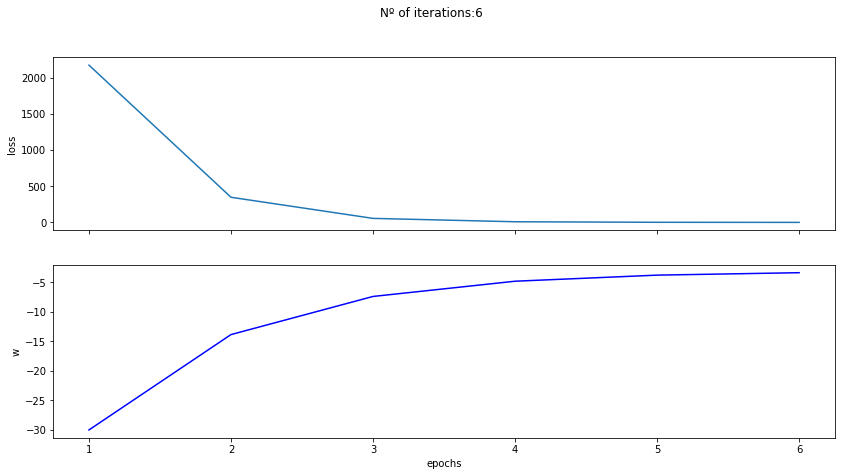

In [15]:
i,W,loss = lossf(6)
fig,ax=plt.subplots(2,1,sharex=True,figsize=(14,7))
plt.style.use('ggplot')
ax[1].plot(i,W,color='blue')
ax[1].set( ylabel='w')
ax[0].plot(i,loss)
ax[0].set( ylabel='loss') 
plt.xlabel('epochs')
plt.suptitle('Nº of iterations:{0}'.format(len(i)))
plt.show()

* Convergencia rápida
* Tiene algún coste computacional